# Iris Flower Plant Dataset

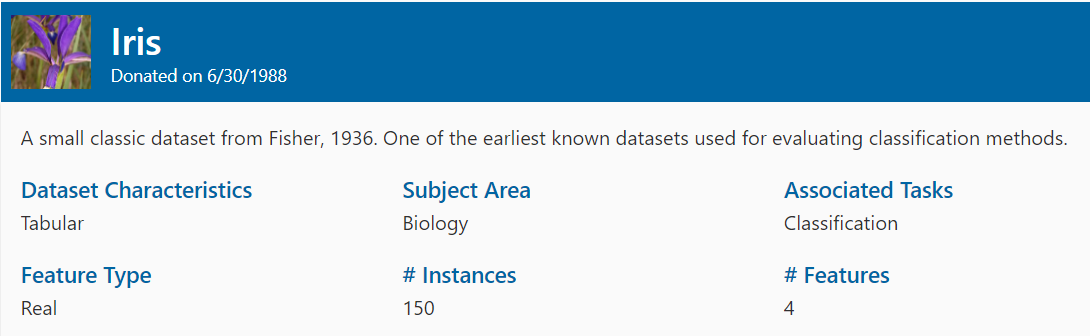

**Thanks To:**
1. Machine Learning Mastery With Python - Jason Brownlee
2. [Iris Dataset UCM Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)

## 1.1 Dataset Information
#### What do the instances in this dataset represent?
Each instance is a plant

## 1.2 Additional Information
This is one of the earliest datasets used in the literature on **classification** methods and widely used in <br>statistics and machine learning.
<br>The data sets contains :-
* 3 classes of **iris flower’ (Setosa, Versicolour, and Virginica)**
* with **50 instances of each,** where each class refers to a type of **iris plant.**
* One class is *linearly separable from the other 2;*
* the latter are not linearly separable from each other.

**Predicted attribute:** class of iris plant.
<br>
<br>This is an exceedingly simple domain.
* The **rows** being the **samples** and
* the **columns** being: **Sepal Length, Sepal Width, Petal Length and Petal Width.**

<br>This data differs from the data presented in Fishers article (identified by Steve Chadwick, <br>spchadwick@espeedaz.net). The **35th** sample should be: **4.9, 3.1, 1.5, 0.2, "Iris-setosa"** where the <br>error is in the **fourth feature.** The **38th** sample: **4.9, 3.6, 1.4, 0.1, "Iris-setosa"** where the errors are in <br>the second and third features.  

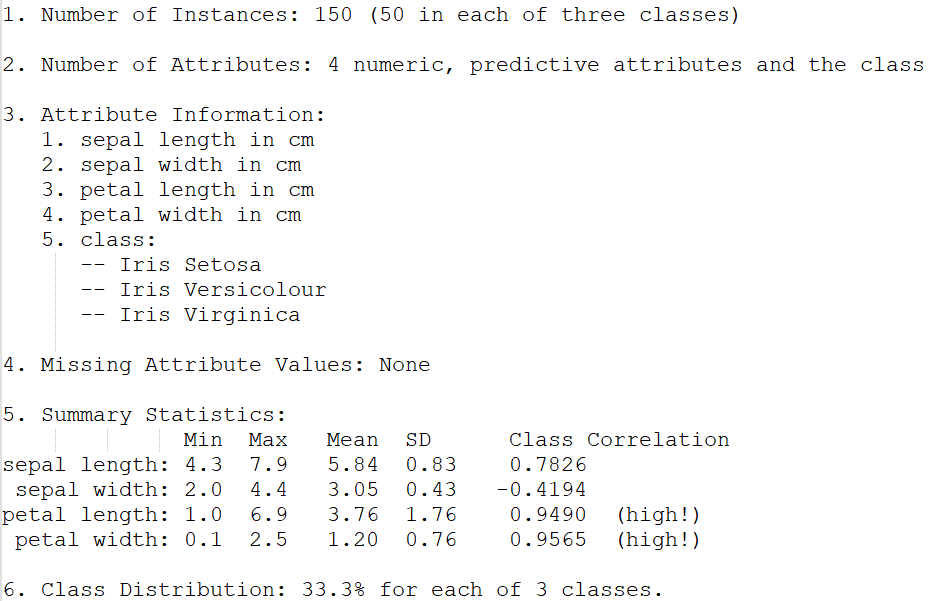

**Number of Instances:** 150 (50 in each of three classes)

**Number of Attributes:** 4 numeric, predictive attributes and the class

**Attribute Information:**
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: </br>
      -- Iris Setosa</br>
      -- Iris Versicolour</br>
      -- Iris Virginica</br>

**Missing Attribute Values:** None

**Summary Statistics:**
              Min  Max   Mean  SD      Class Correlation</br>
<br>sepal length: 4.3  7.9   5.84  0.83    0.7826
<br>sepal width: 2.0  4.4   3.05  0.43   -0.4194 <br>
petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)</br>
 petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)</br>

**Class Distribution:** 33.3% for each of 3 classes.


## 2. Import libraries

In [1]:
# Loading all the libraries required for this project
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##  3. Load The Dataset
In this 1st step, we will load all the libraries and **"iris flower"** dataset CSV file from the **Github** url. <br>We are specifying the names of each column when loading the data.

In [2]:
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_20_Classification_Iris_Plant_Dataset/ML_20_Classification_Iris_Plant_Dataset.csv"
"""
Data attribute:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class
"""
filename = url
names = ['sepal_length','sepal_width','petal_length','petal_width','class']
dataset = read_csv(filename, names=names)
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 4. Dataset EDA (exploratory data analysis)
## 4.1 Summarize the Dataset
• Dimensions of the dataset.<br>
• Peek at the data itself.*(Throw a glance at; take a brief look at)*<br>
• Statistical summary of all attributes.<br>
• Breakdown of the data by the class variable.<br>

 #### Dimensions of Dataset in rows and columns
 It should show 150 instances and 5 attributes

## 4.2 Variable Table

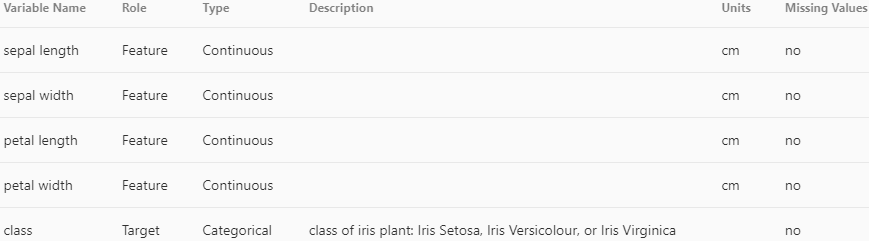

In [3]:
print(dataset.shape)

(150, 5)


## 4.3 Peek at the Data
Throw a glance at the data content

In [4]:
print(dataset.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


## 4.4 Statistical Summary
Now we can take a look at a summary of each attribute. This includes the **count, mean, the min and <br>max values** as well as some percentiles.


In [5]:
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## 5. Data Classification or Class Distribution
Let’s take a look at the **number of instances (rows)** that belong to each class **(Setosa, Versicolour <br>and Virginica)**. We can view this as an absolute count.

We can see that *each class has the same number of instances (**50 or 33%** of the dataset).*

In [6]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 6. Data Visualization
Let's extend this with some visualizations. We are going to take a look at two types of plots:

**• Univariate plots** to better understand each attribute.
<br>**• Multivariate plots** to better understand the relationships between attributes.

### 6.1 Univariate Plots
We will start with some **univariate plots,** that is, plots of each individual variable. Given that the input <br>variables are numeric, we can create **box** and **whisker plots** of each.

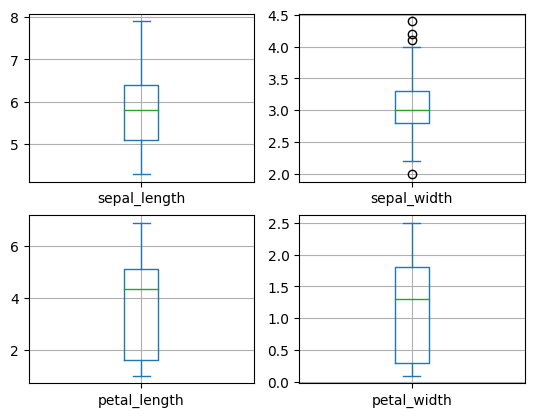

In [7]:
# box and whisker plot of each attribute
# dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=True,sharey=True)
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False,grid=True)
pyplot.show()

We can also create a histogram of each input variable to get an idea of the distribution.

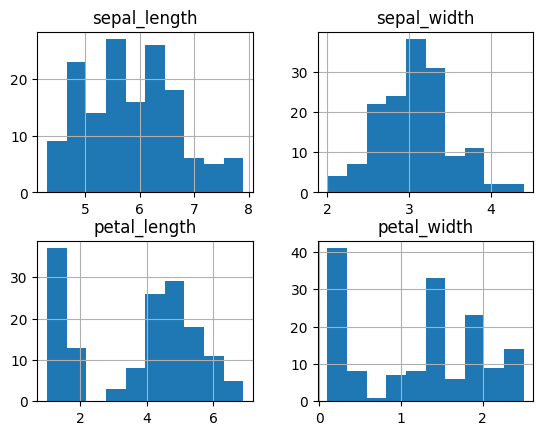

In [8]:
# Histogram Plots of Each Attribute.
dataset.hist()
pyplot.show()

*It looks like perhaps two of the input variables have a Gaussian distribution.*

### 6.2 Gaussian Distribution and Reference Range
**Gaussian distribution** (also known as normal distribution) is a **bell-shaped curve,** and it is assumed <br>that during any measurement, values will follow a normal distribution with an <u>*equal number of measurements above and below the mean value.*</u> In order to understand normal distribution, it is <br>important to know the definitions of **“mean,” “median,” and “mode.”** <br>
<br>
1. The **“mean”** is the calculated **average of all values,** <br>
2. the **“median”** is the **value at the center point (mid-point)** of the distribution, while <br>
3. the **“mode”** is the **value that was observed most frequently** during the measurement.<br>

If a distribution is normal, then the values of the **mean, median, and mode** are the same. However, <br>the value of the **mean, median, and mode** may be different if the distribution is **skewed** (not Gaussian <br>distribution). Other characteristics of Gaussian distributions are as follows:<br>
<br>
▪ Mean ± 1 SD contain 68.2% of all values.<br>
▪ Mean ± 2 SD contain 95.5% of all values.<br>
▪ Mean ± 3 SD contain 99.7% of all values.<br>
<br>
A **Gaussian distribution** is shown in Figure. Usually, reference range is determined by measuring the <br>value of an analyte in a large number of normal subjects (at least 100 normal healthy people, but <br>preferably 200–300 healthy individuals). Then the mean and standard deviations are determined.
<br>
<br>
**Figure :** *A Gaussian distribution showing percentage of values within a certain standard deviation <br>from the mean.*

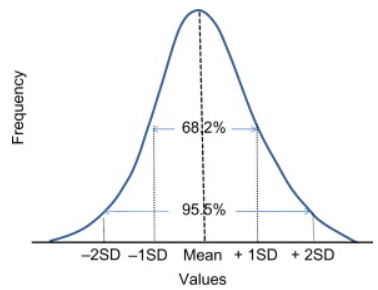

## Normal distributions, also known as bell-shaped curves or Gaussian distributions,
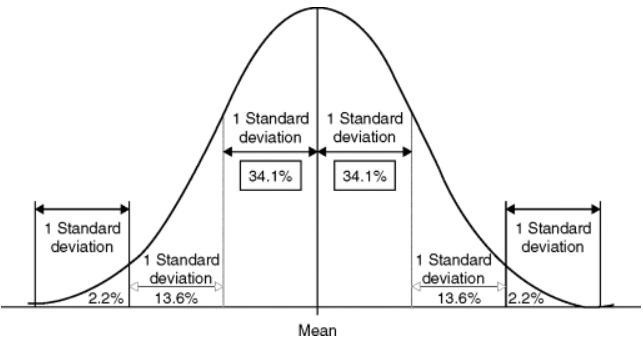

### 6.3 Multivariate Plots
Now we can look at the interactions between the variables. Let’s look at scatter plots of all pairs of <br>attributes. This can be helpful to spot structured relationships between input variables.

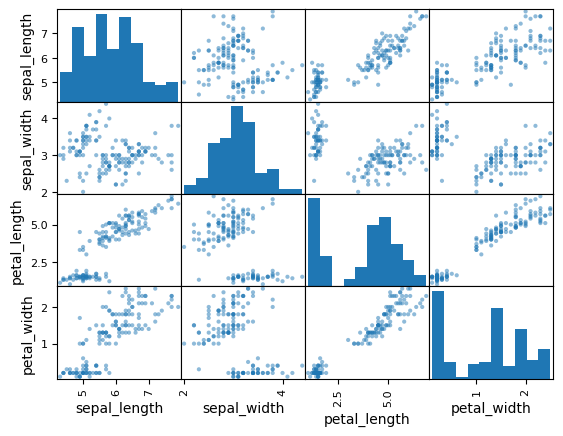

In [9]:
# scatter plot mattrix
scatter_matrix(dataset)
pyplot.show()

## 7. Evaluate Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

## 8. Data Validation
We will split the loaded dataset into two set, **80%** of which we will use to **train** our models and **20%** <br>that we will hold back as a **validation** dataset.

In [10]:
# sepal_length,	sepal_width,	petal_length,	petal_width,	class
array = dataset.values
X = array[:, 0:4] # all instances (rows) and columns 0 to 3 (sepal_length,	sepal_width,	petal_length,	petal_width)
y = array[:,4] # all instances (rows) and column 4 (class)
validation_size = 0.2 # 80% data for training and 20% for validation
seed = 7 # random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

### 8.1 Test Harness
We will use **10-fold cross-validation** to estimate accuracy on unseen data. This will split our dataset <br>into **10 parts,** e.g. the model will **train on 9** and **test on 1** and repeat for all combinations of **train-test splits.**
<br>We are using the **metric of accuracy** to evaluate models.
<br>
<br>This is a proportion of the **number of correctly predicted instances** <br>**divided** by the <br>**total number of instances** in the
dataset <br>**multiplied by 100** to give a **percentage (e.g. 95% accurate).**
<br>
<br>We will be using the scoring variable when we run build and evaluate each model next.

### 8.2 Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We got an idea from the plots <br>that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results. Let’s <br>evaluate **six different algorithms**:<br><br>
#### Linear algorithm  
• Logistic Regression (LR).<br>
• Linear Discriminant Analysis (LDA).<br><br>
#### Non-Linear algorithm  
• k-Nearest Neighbors (KNN).<br>
• Classification and Regression Trees (CART).<br>
• Gaussian Naive Bayes (NB).<br>
• Support Vector Machines (SVM).

In [11]:
models = []
# spot check algorithm
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

# evaluate models in turn
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s:  %f  (%f)" % (name, cv_results.mean(), cv_results.std())

  print(msg)

LR:  0.958333  (0.055902)
LDA:  0.975000  (0.038188)
KNN:  0.983333  (0.033333)
CART:  0.950000  (0.076376)
NB:  0.966667  (0.040825)
SVM:  0.991667  (0.025000)


We can see that it looks like KNN has the largest estimated accuracy score. We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross-validation).

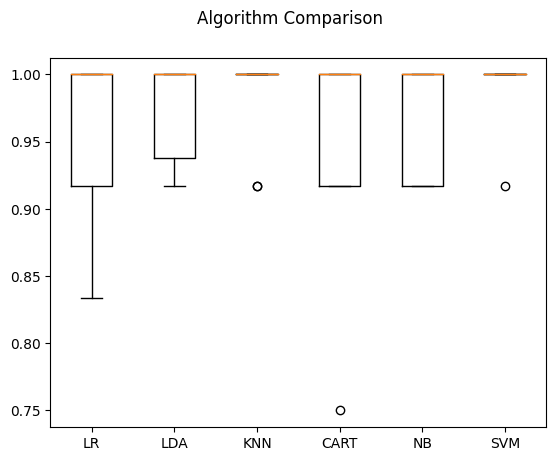

In [12]:
# Algorithm Comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.


## 9. Make Predictions
We will be using here, the KNN algorithm as the most accurate model that we tested so far.

In [13]:
# Make prediction on validation datasets
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# predictions = knn.predict(X_test)

# non-linear SVC with RBF kernel.
from sklearn import svm
svm = svm.NuSVC(gamma="auto")
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

print("Accuracy Score:".ljust(40,"."),accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, predictions))
print("\nClassification Report:\n",classification_report(y_test, predictions))

Accuracy Score:......................... 0.8666666666666667

Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

